## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.05896095],
       [0.21028608],
       [0.31138585],
       [0.33520386],
       [0.80672934]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.0589268 ,  0.20873969,  0.30637813,  0.32896169,  0.72202819,
        0.73656201,  0.82761959,  0.83997518,  0.92267531,  0.95678189,
        0.95796227,  0.99392239,  0.99867794,  0.99997055,  0.99839533,
        0.99586185,  0.96491016,  0.96372332,  0.95019974,  0.92969699,
        0.82766968,  0.82577185,  0.81604807,  0.51561365,  0.36440136,
        0.16163017,  0.02777455, -0.038281  , -0.17987398, -0.20174376,
       -0.25257661, -0.26009691, -0.35546097, -0.40882301, -0.62444186,
       -0.80851018, -0.90641328, -0.9570432 , -0.98176226, -0.96019194])

In [5]:
np.sin( X )[:5]

array([[0.0589268 ],
       [0.20873969],
       [0.30637813],
       [0.32896169],
       [0.72202819]])

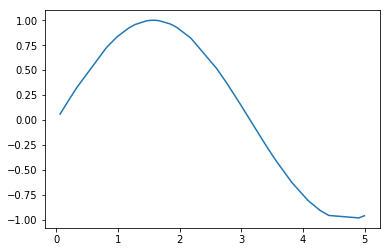

In [6]:
plt.plot( X, y )
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

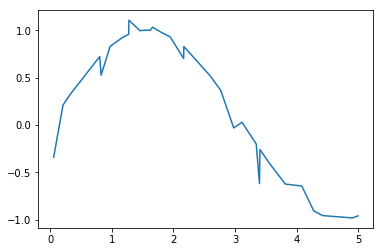

In [8]:
plt.plot( X, y )
plt.show()

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [11]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 5

In [12]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

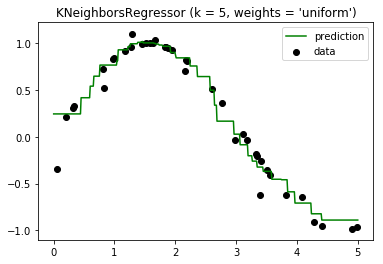

In [13]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

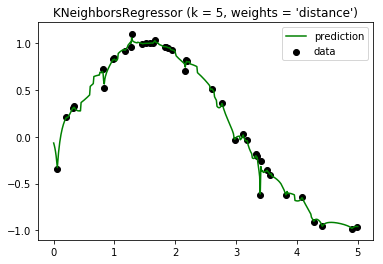

In [14]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()